<img src='imgs/ooipy_banner.png' align="center">

# OOIPY Demo

This Jupyter Notebook walks through the basic functionality of OOIpy

## In this demo you will learn:
- How to download broadband (Fs=64kHz) and low frequency (Fs = 200) Hz from OOI server
- How to compute spectrograms and PSDs from the data
- How to save spectrograms and PSDs to pickle files
- How to plot hydrophone data, spectrograms and PSDs
- How to save Hydrophone Data to .wav file

## Environment Setup

In [1]:
import ooipy
import datetime
from matplotlib import pyplot as plt

# Some Jupyter magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Download Data from OOI

### Valid Hydrophone Nodes: 
#### Broadband
- '\LJ01D' - Oregon Shelf Base Seafloor
- '\LJ01A' - Oregon Slope Base Seafloor
- '\PC01A' - Oregon Slope Base Shallow
- '\PC03A' - Axial Base Shallow Profiler
- '\LJ01C' - Oregon Offshore Base Seafloor
- '\LJ03A' - Axial Base Seafloor
#### Low Frequency
- 'Central_Caldera' - Central Caldera
- 'Eastern_Caldera' - Eastern Caldera
- 'Axial_Base' - Axial Base Seafloor
- 'Southern_Hydrate' - Southern Hydrate Summit 1 Seafloor
- 'Slope Base' - Oregon Slope Base Seafloor

For more detailed information about hydrophones nodes see https://ooinet.oceanobservatories.org/

For a map of hydrophones supported by OOIpy, see https://www.google.com/maps/d/u/1/viewer?mid=1_QKOPTxX2m5CTwgKR5fAGLO0lmbBgT7w&ll=45.16765319565428%2C-127.15744999999998&z=7

In [2]:
# Specify start time, end time, and node for data download (1 minutes of data)
start_time = datetime.datetime(2017,7,1,0,0,0)
end_time = datetime.datetime(2017,7,1,0,1,0)
node1 = 'LJ01D'
node2 = 'Eastern_Caldera'

# Download Broadband data
print('Downloading Broadband Data:')
hdata_broadband = ooipy.get_acoustic_data(start_time, end_time, node1, verbose=True)
print('')
print('Downloading Low Frequency Data:')
hdata_lowfreq = ooipy.get_acoustic_data_LF(start_time, end_time, node2, verbose=True, zero_mean=True)

Fetching URLs...
Sorting valid URLs for Time Window...



The returned data type is the ooipy.hydrophone.basic.HydrophoneData object.
https://ooipy.readthedocs.io/en/latest/hydrophone.html#ooipy.hydrophone.basic.HydrophoneData

To see the data stats, do the following:

In [3]:
print(hdata_broadband.stats)

         network: OO
         station: HYEA2
        location: LJ01D
         channel: YDH
       starttime: 2017-06-30T23:59:59.999999Z
         endtime: 2017-07-01T00:00:59.999999Z
   sampling_rate: 64000.0
           delta: 1.5625e-05
            npts: 3840001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 6324, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 25903104})
      processing: ['ObsPy 1.2.1: trim(endtime=UTCDateTime(2017, 7, 1, 0, 1)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2017, 7, 1, 0, 0))']


In [4]:
print(hdata_lowfreq.stats)

         network: OO
         station: AXEC2
        location: Eastern_Caldera
         channel: HDH
       starttime: 2017-07-01T00:00:00.000000Z
         endtime: 2017-07-01T00:01:00.000000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 12001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 12, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 49152})


### Plot Time Series Data

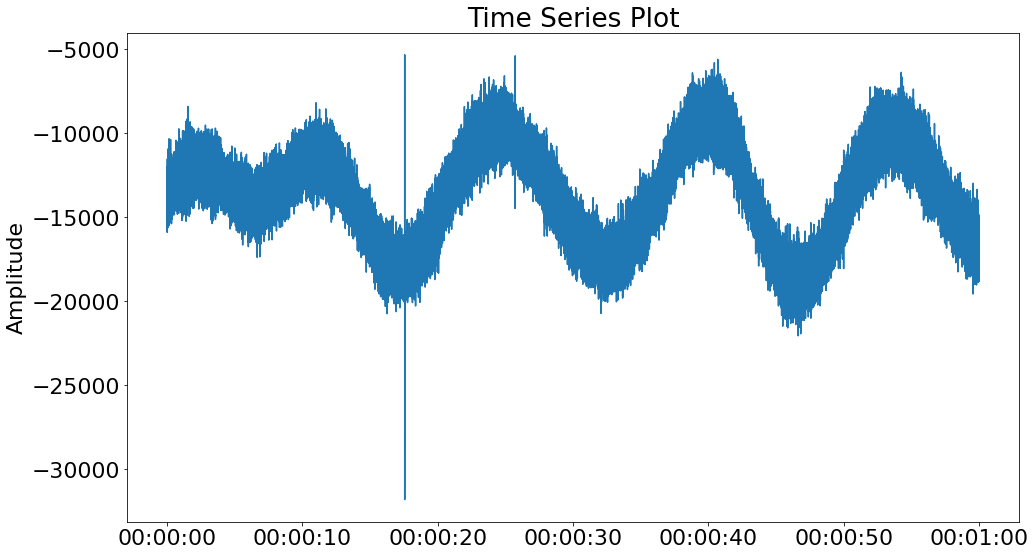

In [5]:
ooipy.plot(hdata_broadband)

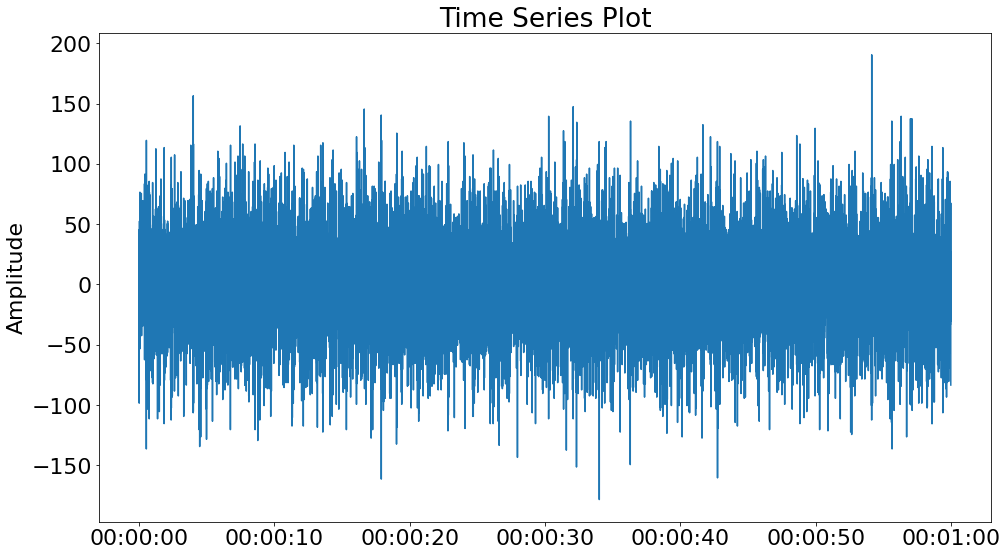

In [6]:
ooipy.plot(hdata_lowfreq)

### Computing Spectrograms and PSDs

In [7]:
spec1 = hdata_broadband.compute_spectrogram()
spec2 = hdata_lowfreq.compute_spectrogram(avg_time=1, overlap=0)

psd1 = hdata_broadband.compute_psd_welch()
psd2 = hdata_lowfreq.compute_psd_welch()

/Users/jhrag/opt/anaconda3/envs/ooi/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 4096 is greater than input length  = 200, using nperseg = 200
  .format(nperseg, input_length))


/Users/jhrag/UW/Ocean_Acoustics/Code/ooipy/ooipy/tools/ooiplotlib.py:191: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'res_reduction_time', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_freq'
  cmap=plt.cm.jet, **kwargs)


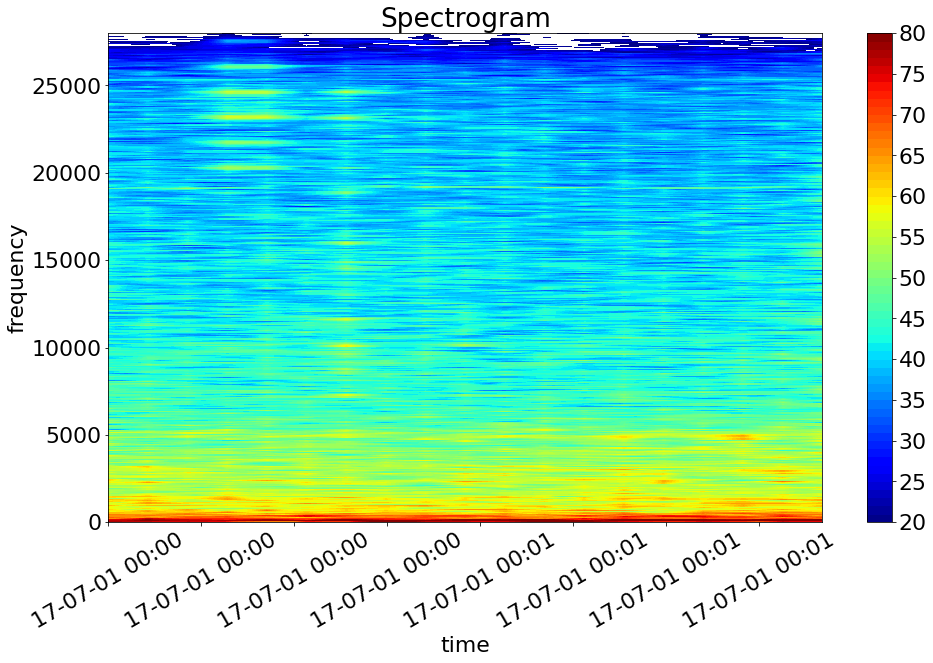

In [8]:
ooipy.plot(spec1, fmin=0, fmax=28000, res_reduction_time=100, xlabel_rot=30)

/Users/jhrag/UW/Ocean_Acoustics/Code/ooipy/ooipy/tools/ooiplotlib.py:191: UserWarning: The following kwargs were not used by contour: 'fmin', 'fmax', 'xlabel_rot', 'plot', 'save', 'filename', 'title', 'xlabel', 'xlabel_format', 'ylabel', 'vdelta', 'vdelta_cbar', 'figsize', 'res_reduction_time', 'res_reduction_freq'
  cmap=plt.cm.jet, **kwargs)


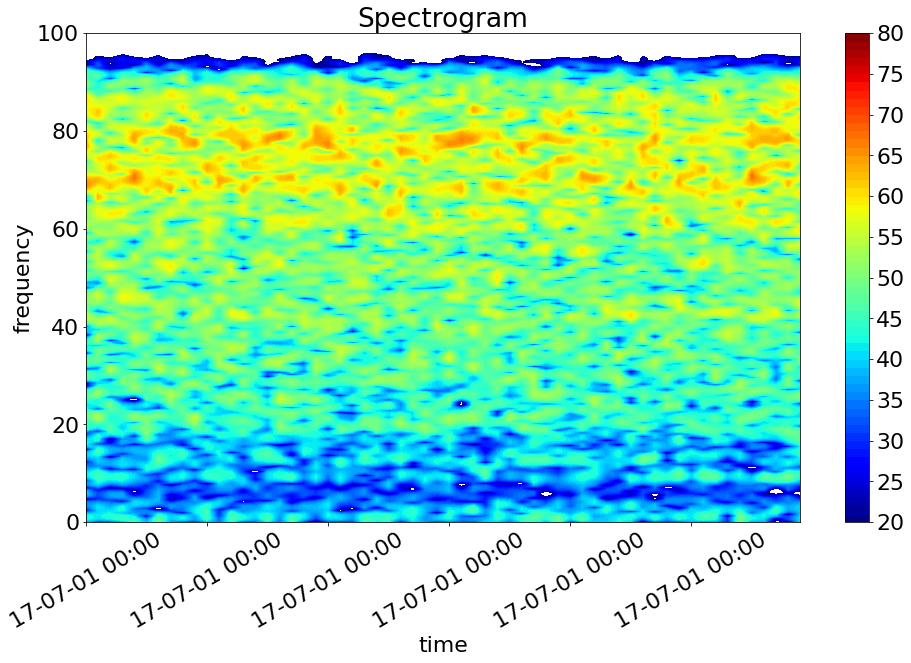

In [9]:
ooipy.plot(spec2, fmin=0, fmax=100, xlabel_rot=30)

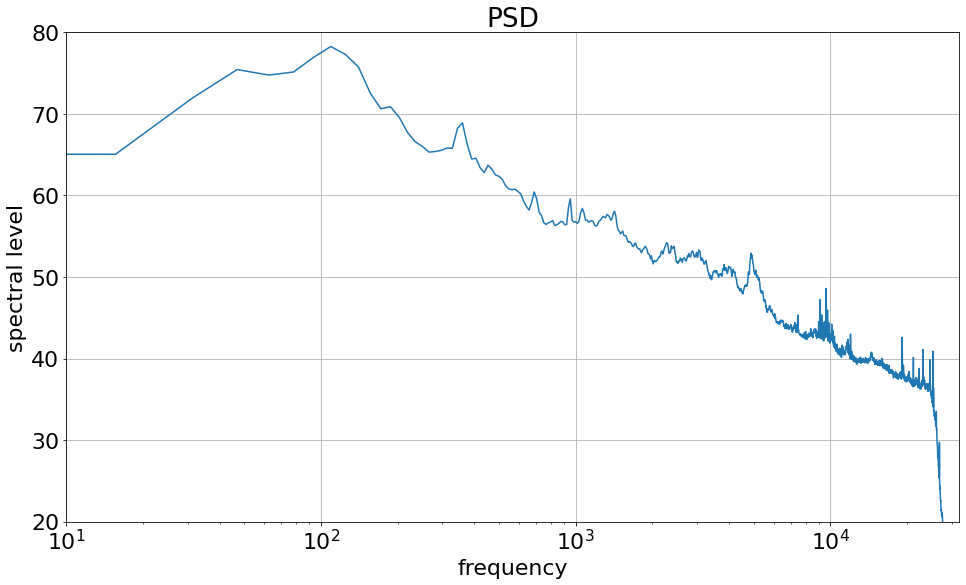

In [10]:
ooipy.plot(psd1, fmin=10, fmax=32000)

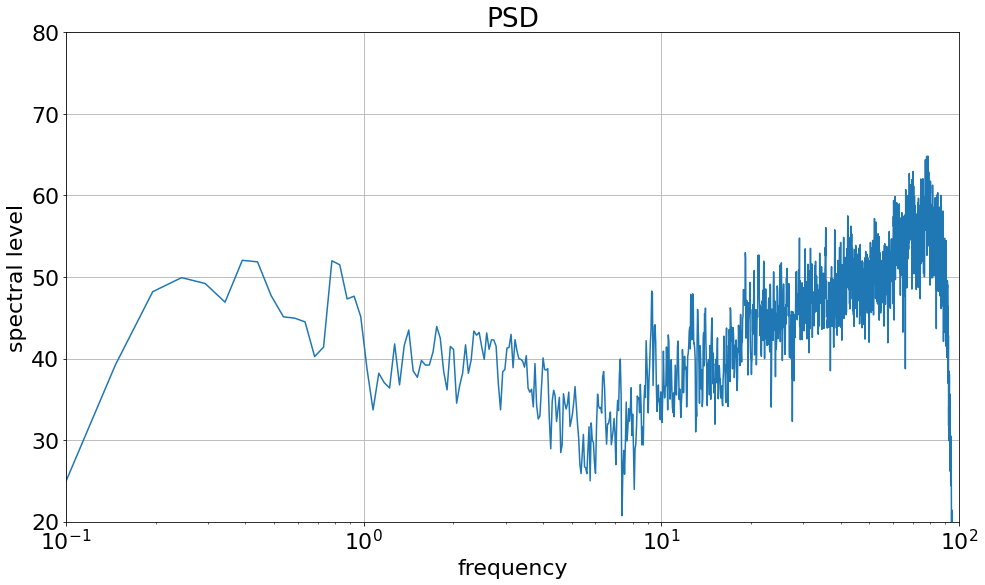

In [11]:
ooipy.plot(psd2, fmin=0.1,fmax=100)

To save a spectrogram or PSD to pickle file, use the save() method of the Spectrogram or PSD class

In [15]:
psd2.save(filename='psd2.pkl')
spec2.save(filename='spec2.pkl')

### Save Hydrophone Data to Wav File
to save the data to a wav file, use the wav_write method of the HydrophoneData class.

Options include normalizing waveform (for media player playback), and changing the sample rate to desired sample rate.
Note, normalize option only works if data is already zero mean

In [13]:
hdata_broadband.wav_write(filename='raw_data.wav')
hdata_lowfreq.wav_write(filename='audio_for_playback.wav', norm=True, new_sample_rate=44100)

### Different PSD estimators

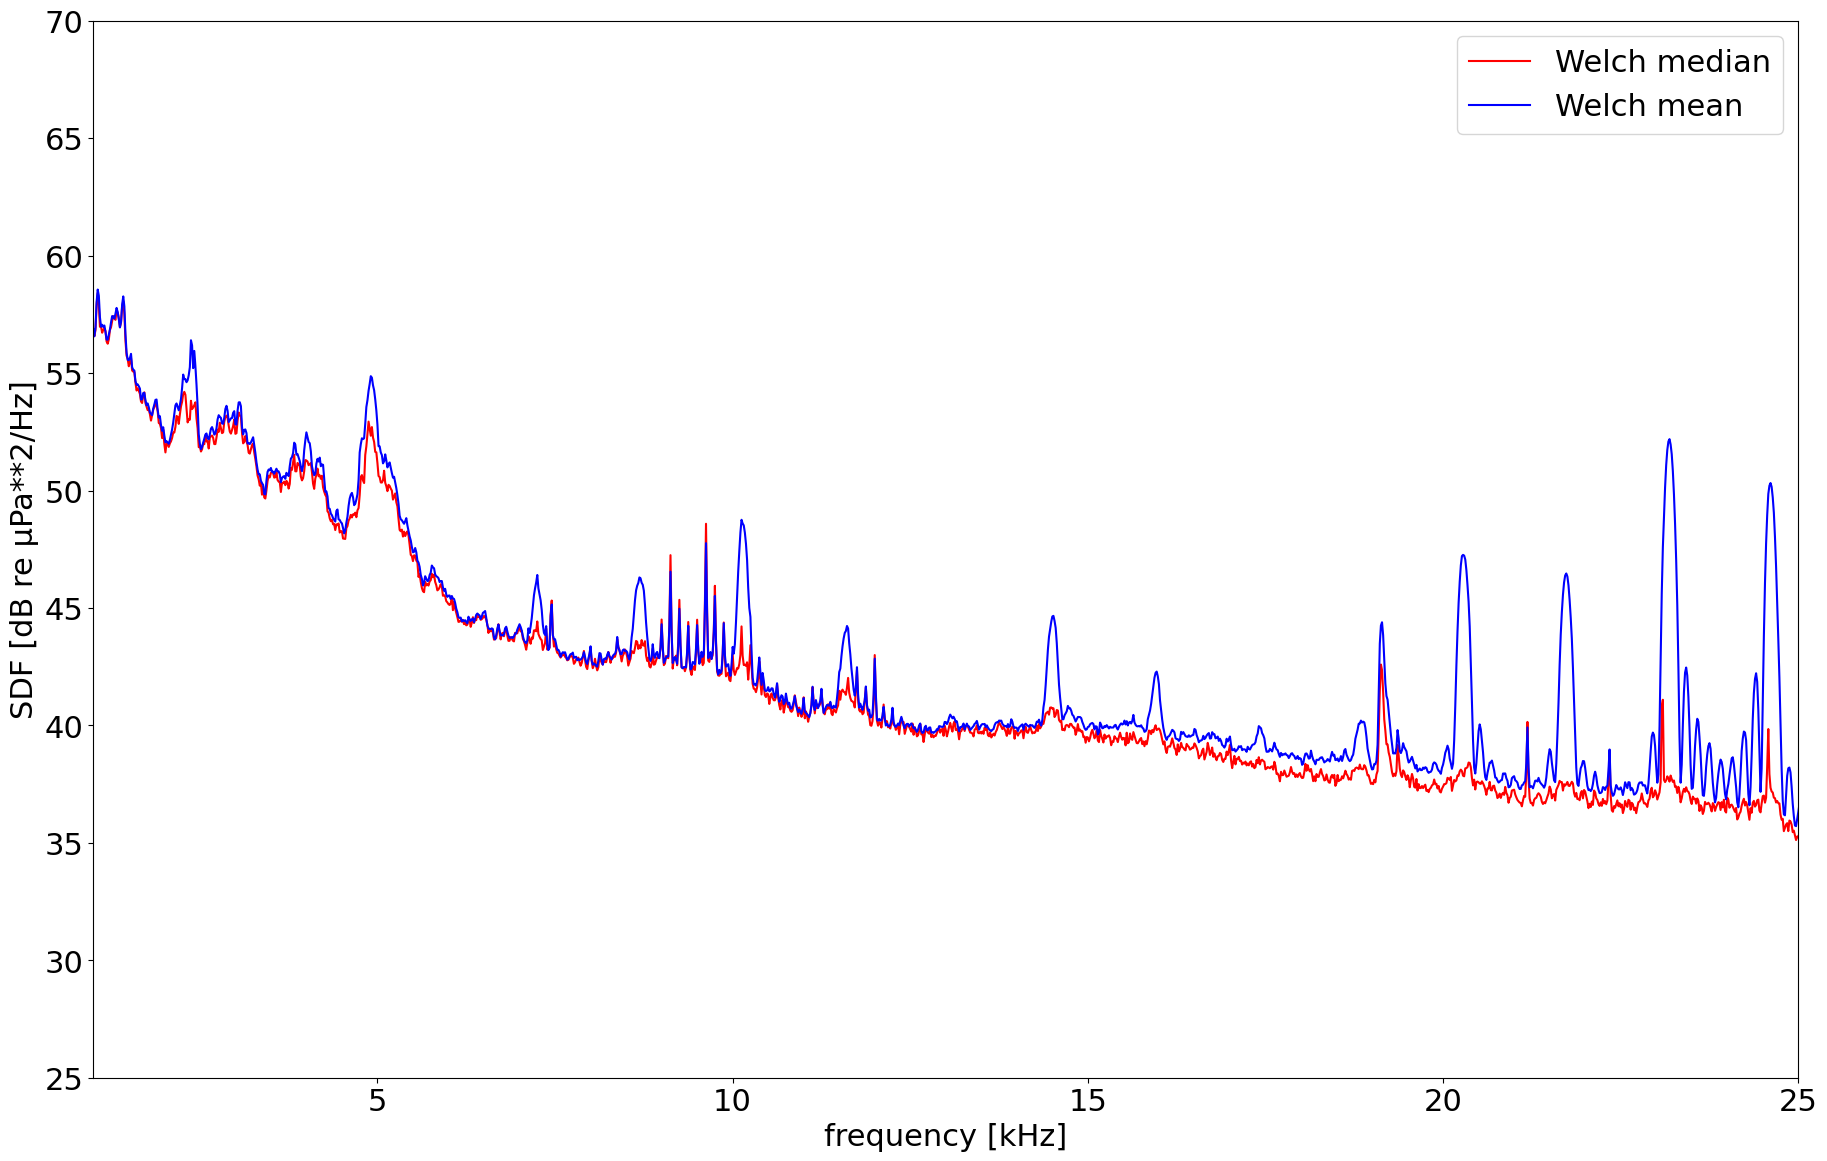

In [14]:
# power spectral density estimate of noise data using Welch's method
fig, ax = plt.subplots(figsize=(22,14), dpi=100)

# 1. using median averaging (default)
hdata_broadband.compute_psd_welch()

f = hdata_broadband.psd.freq / 1000
plt.plot(f, hdata_broadband.psd.values, label='Welch median',color='r')

# 2. using mean averaging
hdata_broadband.compute_psd_welch(avg_method='mean')

plt.plot(f, hdata_broadband.psd.values, label='Welch mean',color='b')
plt.xlabel('frequency [kHz]')
plt.ylabel('SDF [dB re µPa**2/Hz]')
plt.xlim(1,25)
plt.ylim(25,70)
plt.legend()